Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
# import numpy as np
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.datasets import load_iris
# from sklearn import datasets
# from sklearn.model_selection import train_test_split

# # Carregar o dataset Iris
# iris = load_iris()
# X = iris.data
# y = iris.target

# # Dividir o dataset em treinamento e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Criar uma Decision Tree
# clf = DecisionTreeClassifier(random_state=42)

# # Treinar a Decision Tree
# clf.fit(X_train, y_train)

# # Prever as classes para o conjunto de teste
# y_pred = clf.predict(X_test)

# # Imprimir a precisão da Decision Tree
# print("Precisão:", clf.score(X_test, y_test))

# Exercício 1 - Treinamento do modelo baseado em árvore de decisão

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# load the data
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf_fit = clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 0.8416666666666667


# Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble

In [3]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

### XGBoost

In [4]:
# load the data
digits = datasets.load_digits()
X = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create regression matrices
dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# Define hyperparameters
params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 10}
n = 1000

results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

results.keys()

results['test-auc-mean'].max()

np.float64(0.9988071921221969)

### Random Forest

In [25]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz

# load the data
digits = datasets.load_digits()
X = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.975


# Exercício 3 - Visualização da árvore de decisão e Medida de Impureza

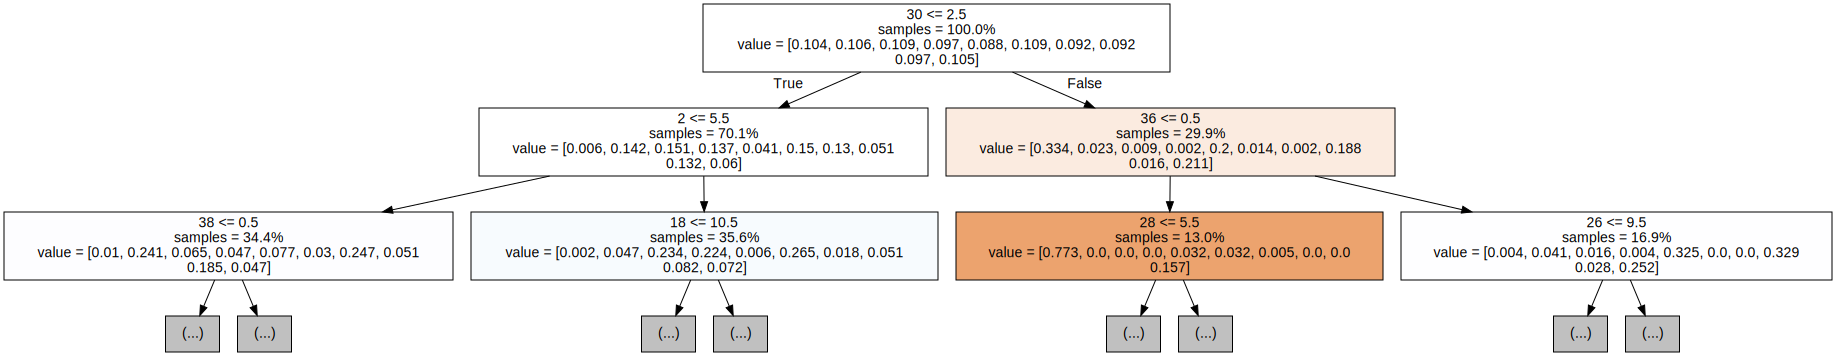

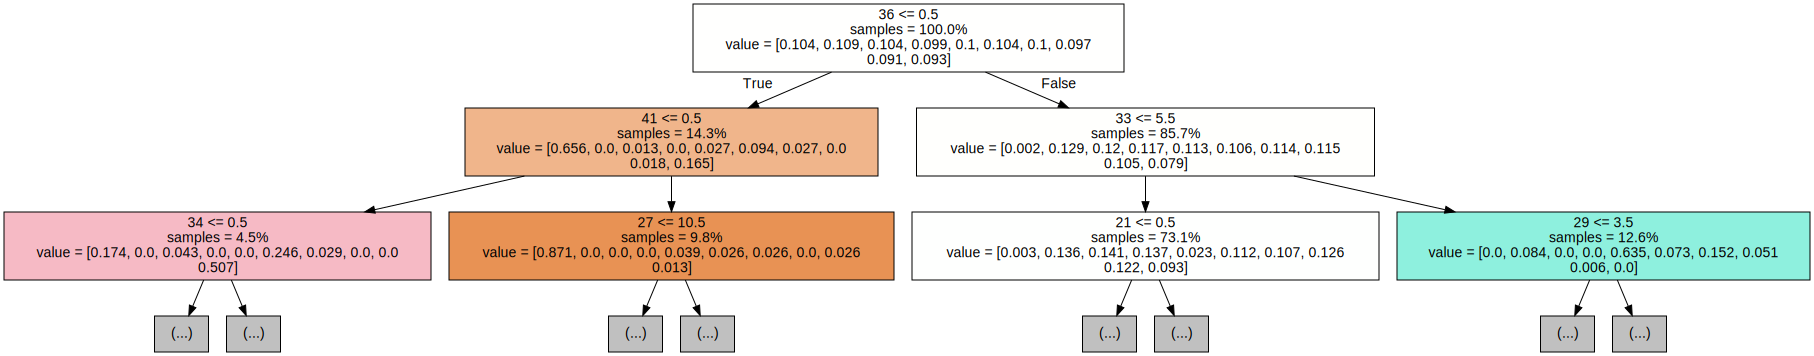

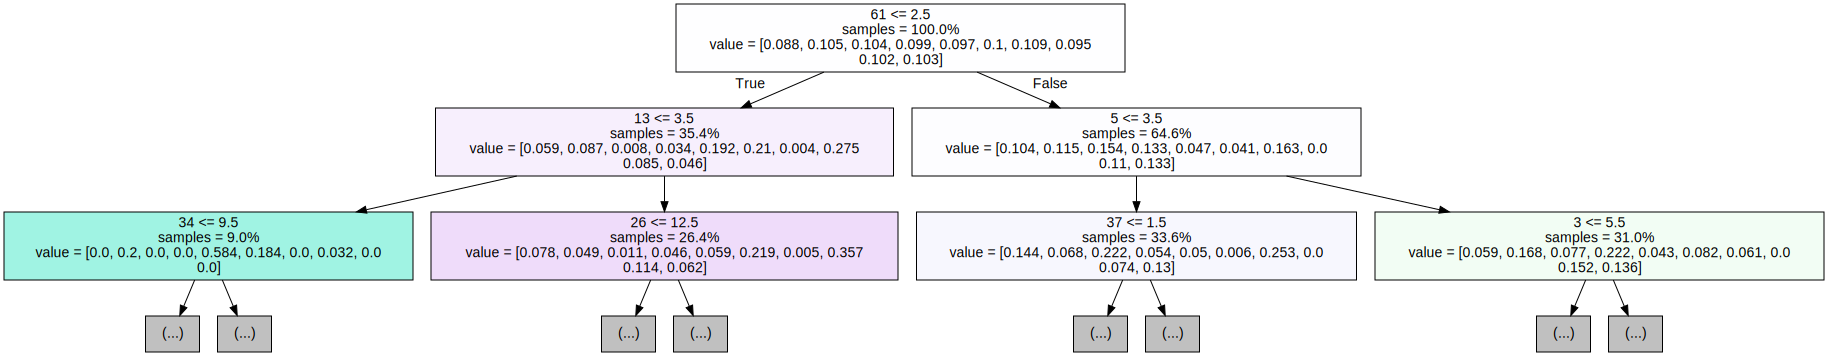

In [24]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Accuracy with Gini Impurity and constraints: 0.9444444444444444


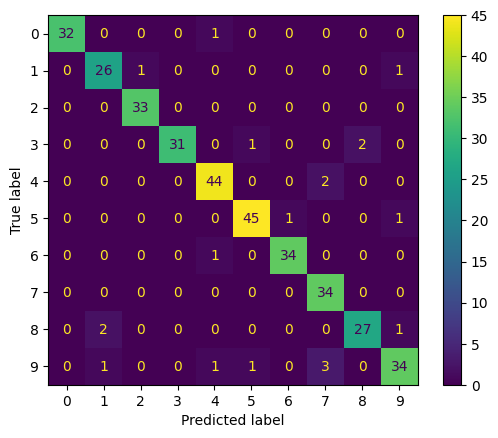

In [26]:
rf = RandomForestClassifier(criterion='gini', random_state=42, max_depth=5, min_samples_split=10)
rf.fit(X_train, y_train.values.ravel())

y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Gini Impurity and constraints:", accuracy)

# Confusion Matrix to visualize performance
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Accuracy with Gini Impurity and constraints: 0.9611111111111111


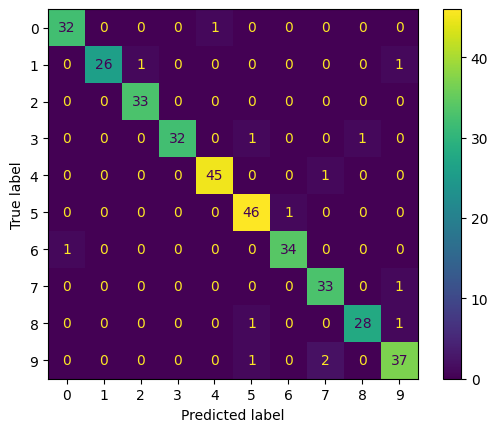

In [27]:
rf = RandomForestClassifier(criterion='entropy', random_state=42, max_depth=5, min_samples_split=10)
rf.fit(X_train, y_train.values.ravel())

y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Gini Impurity and constraints:", accuracy)

# Confusion Matrix to visualize performance
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Accuracy with Gini Impurity and constraints: 0.9444444444444444


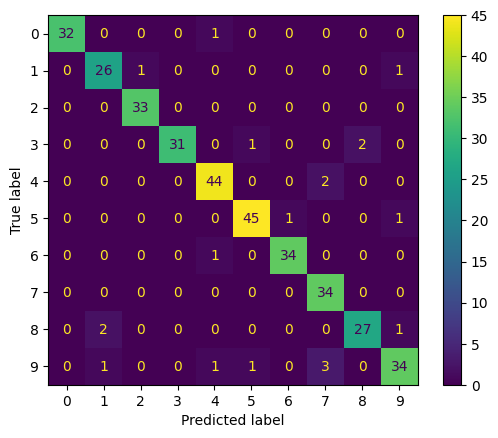

In [28]:
rf = RandomForestClassifier(criterion='gini', random_state=42, max_depth=5, min_samples_split=10)
rf.fit(X_train, y_train.values.ravel())

y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Gini Impurity and constraints:", accuracy)

# Confusion Matrix to visualize performance
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()